<a href="https://colab.research.google.com/github/muli2487/Twitter-Sentiment-Analysis-and-Bitcoin-Stock-Prediction/blob/master/Time_series_bit_coin_USING_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First, import the relevant modules
import requests
import json

In [2]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r= requests.get('https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.json?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-2-29')
print(r.status_code)

200


In [0]:
dict = r.json()

In [4]:
#explore the structure of the dictionary
for key, value in dict.items() :
    print (key)

dataset


In [5]:
print(dict['dataset'])

{'id': 7692468, 'dataset_code': 'MKPRU', 'database_code': 'BCHAIN', 'name': 'Bitcoin Market Price USD', 'description': 'Data showing the USD market price from Mt.gox', 'refreshed_at': '2020-06-12T05:00:43.052Z', 'newest_available_date': '2020-06-13', 'oldest_available_date': '2009-01-03', 'column_names': ['Date', 'Value'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2016-01-01', 'end_date': '2020-02-29', 'data': [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10'

In [6]:
# To make this clearer, let's iterate over the nested elements in the main dictionary

for key, value in dict['dataset'].items():
    print (key, value)

id 7692468
dataset_code MKPRU
database_code BCHAIN
name Bitcoin Market Price USD
description Data showing the USD market price from Mt.gox
refreshed_at 2020-06-12T05:00:43.052Z
newest_available_date 2020-06-13
oldest_available_date 2009-01-03
column_names ['Date', 'Value']
frequency daily
type Time Series
premium False
limit None
transform None
column_index None
start_date 2016-01-01
end_date 2020-02-29
data [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10', 9907.12], ['2020-02-09', 9807.54], ['2020-02-08', 9755.66], ['2020-02-07', 9614.9], ['2020-0

## Calculate what the highest and lowest opening prices were for the stock in this period.

In [7]:
p = dict['dataset']['data']
z= [x[1] for x in p]
res=[]
for val in z:
    if val!= None:
        res.append(val)
print("The maximum opening value in 2016 & 2020 was " +  str(max(res)))
print("The minimum opening value in 2016 & 2020 was " +  str(min(res)))

The maximum opening value in 2016 & 2020 was 19498.6833333
The minimum opening value in 2016 & 2020 was 368.38


In [8]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta 
from tqdm import tqdm_notebook as tqdm
plt.style.use('bmh')

In [0]:
url = url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-5-29&order=asc'

In [11]:
df= pd.read_csv( url ,index_col = None)
df.head()

,Date,Value
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [12]:
df.tail()

,Date,Value
1606,2020-05-25,9178.32
1607,2020-05-26,8730.73
1608,2020-05-27,8899.66
1609,2020-05-28,8842.85
1610,2020-05-29,9197.54


In [13]:
#Cleaning data
df.columns= ['DATE' ,'PRICE']
df.head()

,DATE,PRICE
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [0]:
#Covert into Datatime
df['DATE'] = pd.to_datetime(df['DATE'])

In [15]:
df.head()

,DATE,PRICE
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [0]:
df.set_index('DATE',inplace =True)

In [17]:
df.head()

,PRICE
DATE,
2016-01-01,429.34
2016-01-02,432.33
2016-01-03,433.94
2016-01-04,428.13
2016-01-05,433.00


In [18]:
df.describe()

,PRICE
count,1611.000000
mean,5176.685005
std,3894.048691
min,368.380000
25%,1000.241000
50%,5269.790000
75%,8153.505833
max,19498.683333


## Visualize the Data

In [0]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

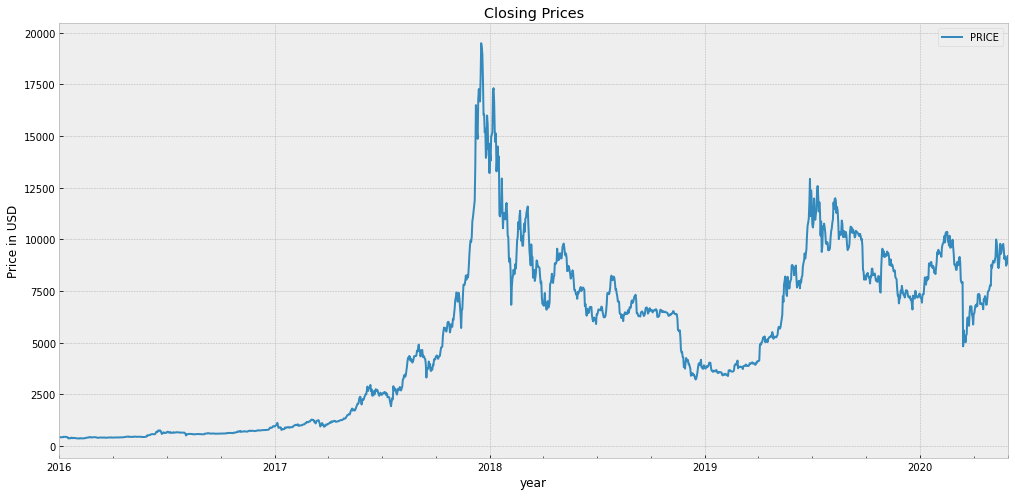

In [20]:
df.plot(figsize=(17,8), title='Closing Prices')
plt.xlabel('year')
plt.ylabel("Price in USD")
plt.show()

<Figure size 432x288 with 0 Axes>

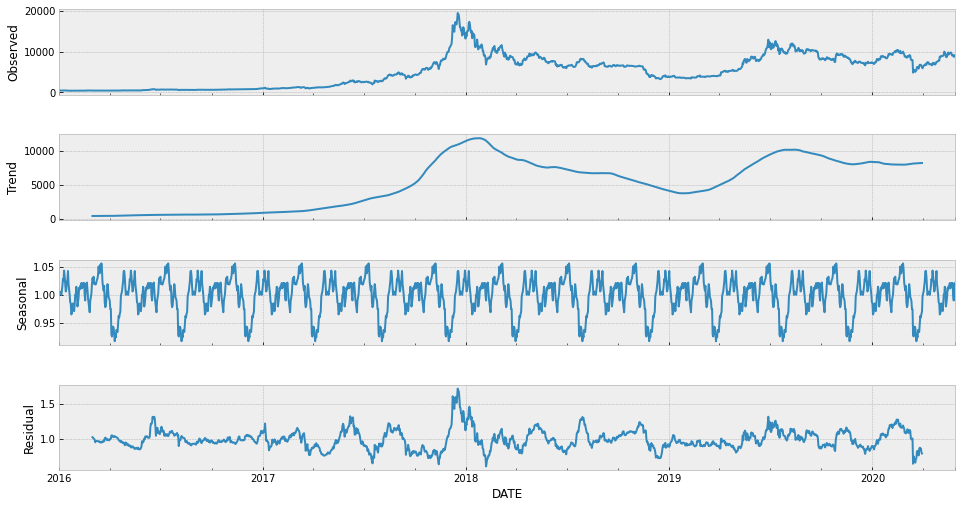

In [22]:
decomposition = seasonal_decompose(df.PRICE, model='multiplicative',freq = 120)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [23]:
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid) 

DATE
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
Name: PRICE, Length: 1611, dtype: float64
DATE
2016-01-01    1.000028
2016-01-02    1.005914
2016-01-03    1.001310
2016-01-04    1.004708
2016-01-05    0.999895
                ...   
2020-05-25    0.999572
2020-05-26    0.990073
2020-05-27    1.019521
2020-05-28    1.007861
2020-05-29    1.021951
Name: PRICE, Length: 1611, dtype: float64
DATE
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
Name: PRICE, Length: 1611, dtype: float64


In [0]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(df['PRICE'])

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PRICE):
    result=adfuller(PRICE)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [27]:
adfuller_test(df['PRICE'])

ADF Test Statistic : -1.916871538611568
p-value : 0.3241663041553058
#Lags Used : 24
Number of Observations Used : 1586
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [0]:
df['Price Difference'] = df['PRICE'] - df['PRICE'].shift(1)

In [29]:
 df['PRICE'].shift(1)

DATE
2016-01-01        NaN
2016-01-02     429.34
2016-01-03     432.33
2016-01-04     433.94
2016-01-05     428.13
               ...   
2020-05-25    9167.26
2020-05-26    9178.32
2020-05-27    8730.73
2020-05-28    8899.66
2020-05-29    8842.85
Name: PRICE, Length: 1611, dtype: float64

In [30]:
df.head()

,PRICE,Price Difference
DATE,,
2016-01-01,429.34,NaN
2016-01-02,432.33,2.99
2016-01-03,433.94,1.61
2016-01-04,428.13,-5.81
2016-01-05,433.00,4.87


In [31]:
## Again test dickey fuller test
adfuller_test(df['Price Difference'].dropna())

ADF Test Statistic : -7.831947221576719
p-value : 6.258939460787339e-12
#Lags Used : 23
Number of Observations Used : 1586
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


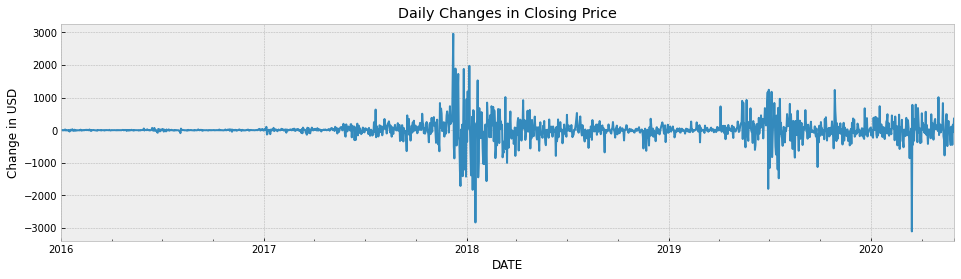

In [32]:
df['Price Difference'].plot(figsize=(16,4), title="Daily Changes in Closing Price")
plt.ylabel("Change in USD")
plt.show()

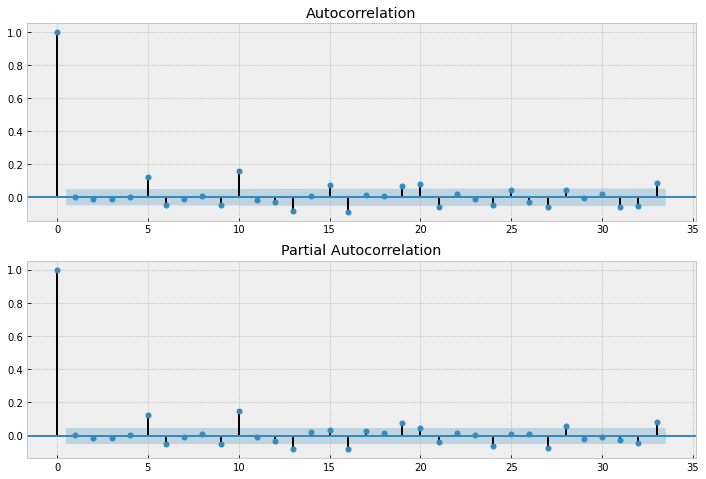

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price Difference'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price Difference'].dropna(), ax=ax2)

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['PRICE'],order=(5,1,5))
model_fit=model.fit(disp = 0)



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [43]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.PRICE   No. Observations:                 1610
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -11527.972
Method:                       css-mle   S.D. of innovations            311.417
Date:                Fri, 12 Jun 2020   AIC                          23079.945
Time:                        21:18:37   BIC                          23144.553
Sample:                    01-02-2016   HQIC                         23103.928
                         - 05-29-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4455      8.684      0.627      0.531     -11.576      22.467
ar.L1.D.PRICE    -0.2436      0.154     -1.580      0.114      -0.546       0.059
ar.L2.D.PRICE    -0.2302      0.169     

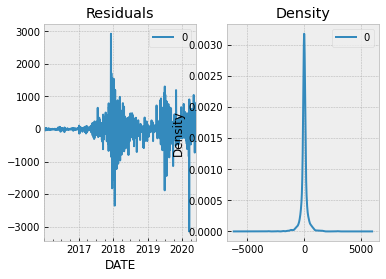

In [48]:

#Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

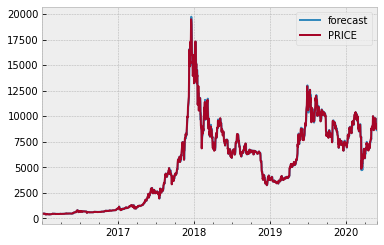

In [49]:
#Let’s plot the actuals against the fitted values using plot_predict().
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [69]:
#How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
#In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.
#To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.PRICE[:1285]
test = df.PRICE[1285:]
#train
test

DATE
2019-07-09    11477.01
2019-07-10    12313.08
2019-07-11    12586.78
2019-07-12    12099.90
2019-07-13    11352.87
                ...   
2020-05-25     9178.32
2020-05-26     8730.73
2020-05-27     8899.66
2020-05-28     8842.85
2020-05-29     9197.54
Name: PRICE, Length: 326, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


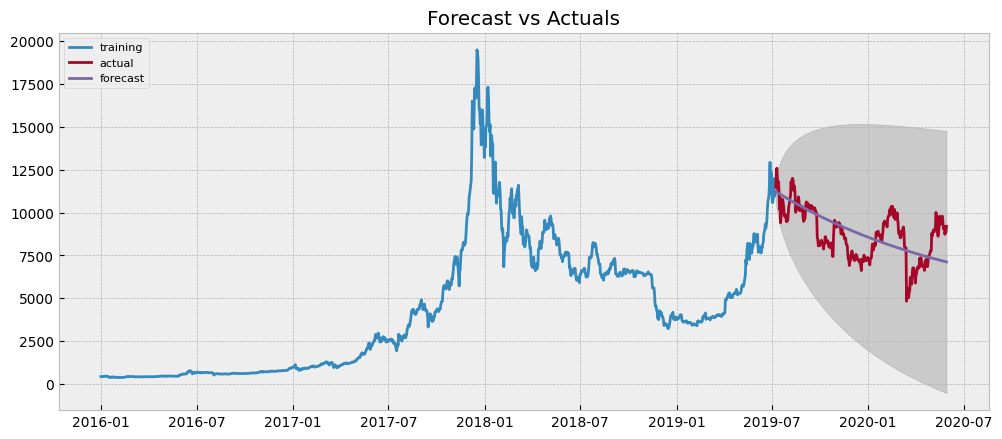

In [114]:
#build the ARIMA model on training dataset, forecast and plot it.
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1,0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(326, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [115]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9511301189617692,
 'corr': 0.5802725251426202,
 'mae': 1035.4186258225814,
 'mape': 0.1270703505832962,
 'me': 160.899487611458,
 'minmax': 0.11309662278838839,
 'mpe': 0.03599105728977757,
 'rmse': 1243.1759382224732}

## Auto Arima Forecast in Python

In [116]:
!pip install pmdarima 

In [117]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.PRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=23139.434, BIC=23160.970, Time=0.683 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=23135.434, BIC=23146.202, Time=0.064 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=23137.432, BIC=23153.584, Time=0.062 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=23137.436, BIC=23153.588, Time=0.148 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=23133.904, BIC=23139.288, Time=0.045 seconds
Total fit time: 1.017 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1611
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11565.952
Date:                Fri, 12 Jun 2020   AIC                          23133.904
Time:                        22:24:36   BIC                          23139.288
Sample:                             0   HQIC                 

# Residual plots using stepwise_fit.

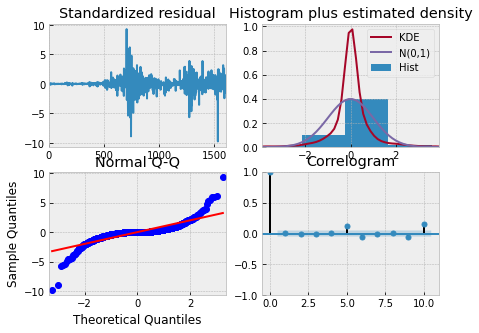

In [118]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

# Final Forecast

In [122]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.PRICE), len(df.PRICE)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.PRICE)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

ValueError: ignored

## Seasonal Difference

In [0]:
df['Seasonal First Difference']=df['PRICE']-df['PRICE'].shift(120)

In [34]:
df.head(140)

,PRICE,Price Difference,Seasonal First Difference
DATE,,,
2016-01-01,429.34,NaN,NaN
2016-01-02,432.33,2.99,NaN
2016-01-03,433.94,1.61,NaN
2016-01-04,428.13,-5.81,NaN
2016-01-05,433.00,4.87,NaN
...,...,...,...
2016-05-15,455.65,-1.17,64.03
2016-05-16,457.08,1.43,86.68
2016-05-17,454.88,-2.20,69.43


In [35]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.921545644346556
p-value : 0.042899287858174595
#Lags Used : 24
Number of Observations Used : 1466
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


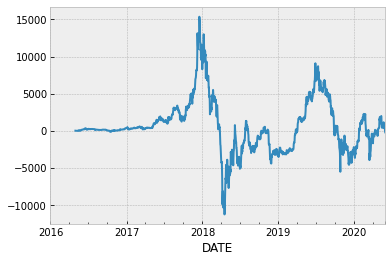

In [36]:
df['Seasonal First Difference'].plot()

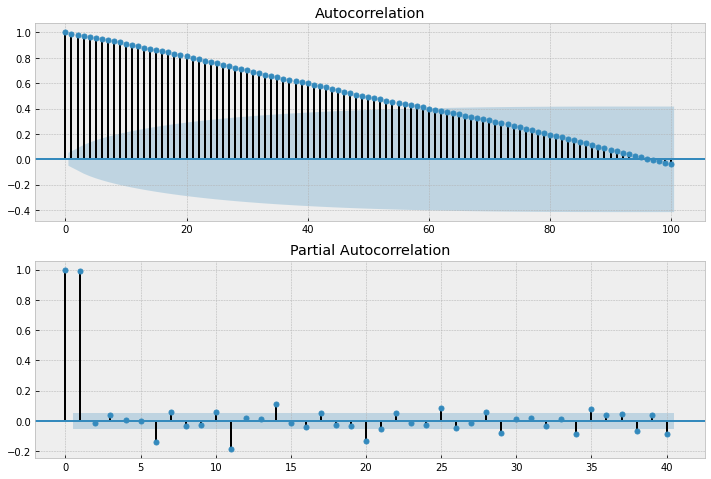

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[120:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[120:], lags=40, ax=ax2)

## Auto Regressive Model¶

## From the above pacf plot my P = 2,q= 96,d =1

In [0]:
from statsmodels.tsa.arima_model import ARIMA


In [35]:
model=ARIMA(df['PRICE'],order=(2,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.PRICE   No. Observations:                 1610
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11565.032
Method:                       css-mle   S.D. of innovations            318.719
Date:                Fri, 12 Jun 2020   AIC                          23140.065
Time:                        20:54:28   BIC                          23166.985
Sample:                    01-02-2016   HQIC                         23150.058
                         - 05-29-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4461      7.863      0.693      0.489      -9.965      20.857
ar.L1.D.PRICE    -0.7132      0.168     -4.256      0.000      -1.042      -0.385
ar.L2.D.PRICE    -0.0194      0.025     -0.764      0.445      -0.069       0.030
ma.L1.D.PRICE     0.7152      0.166      4.312      0.000       0.390       1.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4602           +0.0000j            1.4602            0.5000
AR.2          -35.2213           +0.0000j           35.2213            0.5000
MA.1           -1.3983           +0.0000j            1.3983            0.5000
-----------------------------------------------------------------------------
"""

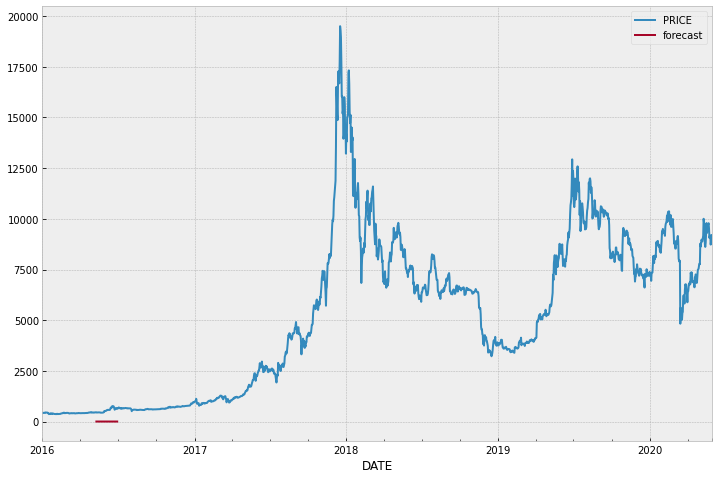

In [37]:
df['forecast']=model_fit.predict(start=130,end=180,dynamic=True)
df[['PRICE','forecast']].plot(figsize=(12,8))

## SARMA

In [0]:
import statsmodels.api as sm

In [0]:
def best_param(model, data, pdq, pdqs):
    """
    Loops through each possible combo for pdq and pdqs
    Runs the model for each combo
    Retrieves the model with lowest AIC score
    """
    ans = []
    for comb in tqdm(pdq):
        for combs in tqdm(pdqs):
            try:
                mod = model(data,
                            order=comb,
                            seasonal_order=combs,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df.aic.astype(float).idxmin()]

In [0]:

# Assigning variables for p, d, q.
p = d = q = range(0,4)
d = [1]

# Creating a list of all possible combinations of p, d, and q.
pdq = list(itertools.product(p, d, q))
#pdq = [(3,1,3)]

# Keeping seasonality at zeroes
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#pdqs = [(0,0,0,0)]

In [0]:
# Finding the best parameters for daily data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook as tqdm
import datetime




In [50]:
best_param(SARIMAX, df.dropna(), pdq, pdqs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

ValueError: ignored

In [0]:
model=sm.tsa.statespace.SARIMAX(df.PRICE,order=(2, 1, 0),seasonal_order=(2,1,0,97))
results=model.fit()

In [0]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['PRICE'])
plt.show()